In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pathlib as pl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/Poatek/GAN
%ls -lah

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Poatek/GAN
total 2.6M
-rw------- 1 root root 131K Sep 12 17:13 DCGAN_test.ipynb
-rw------- 1 root root 267K Sep 12 16:49 DCGAN_train.ipynb
-rw------- 1 root root 1.1M Sep 11 14:36 D.pth
drwx------ 2 root root 4.0K Sep 12 16:41 generated_images/
-rw------- 1 root root 1.1M Sep 11 14:36 G.pth
drwx------ 2 root root 4.0K Sep 12 14:35 __pycache__/
drwx------ 2 root root 4.0K Sep 11 12:40 samples/
drwx------ 2 root root 4.0K Sep 11 12:40 save/


In [3]:
# Hyper-parameters
latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 300
batch_size = 32

# Discriminator
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

# Generator 
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Device setting
D = D.to(device).eval()
G = G.to(device).eval()

# load weights
D.load_state_dict(torch.load('./save/D--300.pth'))
G.load_state_dict(torch.load('./save/G--300.pth'))

<All keys matched successfully>

In [5]:
def save(filepath, image):
    '''Save the current image with no whitespace'''
    plt.gca().set_axis_off()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.imshow(fake_images_np[i], cmap='gray')
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0)

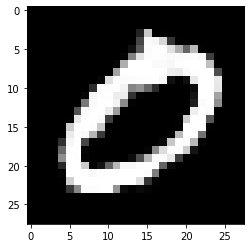

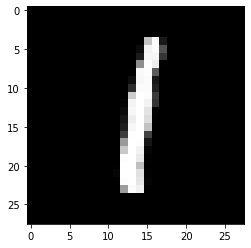

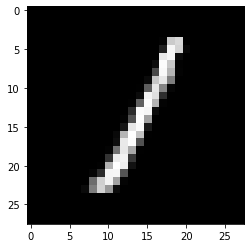

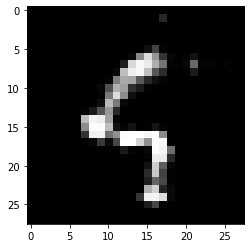

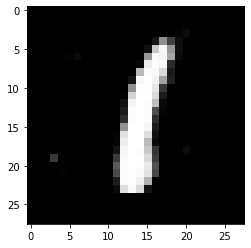

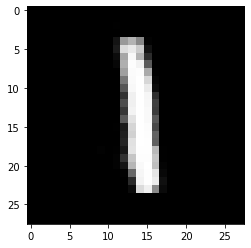

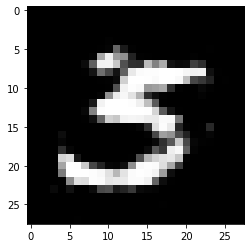

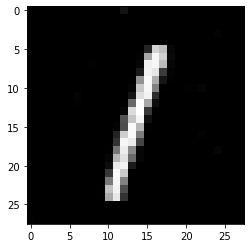

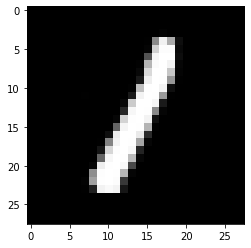

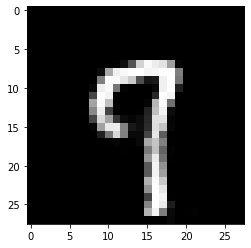

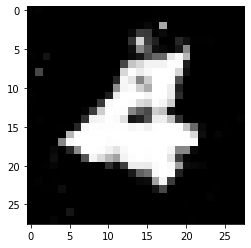

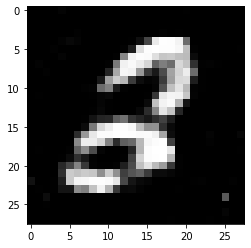

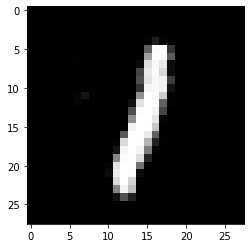

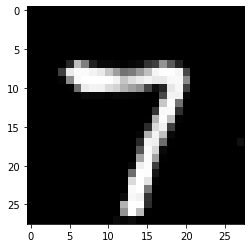

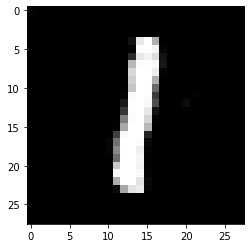

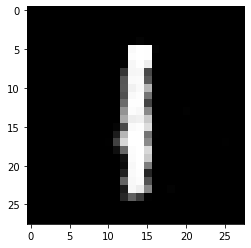

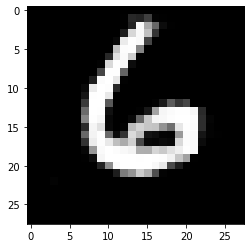

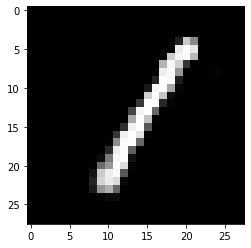

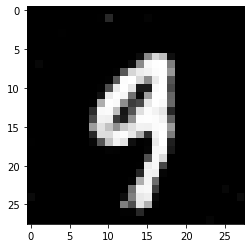

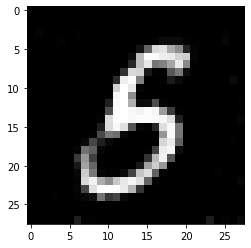

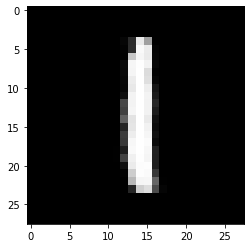

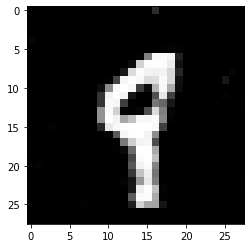

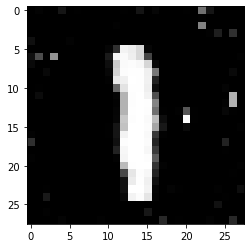

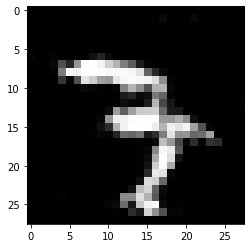

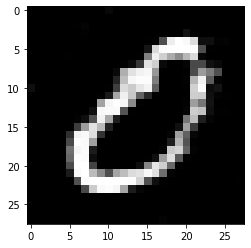

In [6]:
latent_size = 64
batch_size = 25

z = torch.randn(batch_size, latent_size).to(device)
fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)

output_dir = "./generated_images" 
pl.Path(output_dir).mkdir(parents=True, exist_ok=True)

for i in range(fake_images_np.shape[0]):
    # plt.imshow(fake_images_np[i], cmap='gray')
    # plt.show()
    save(f"{output_dir}/img_{i}.png", fake_images_np[i])